# R-Demo
## 許sir 
## Sep. 05. 2018 at STPI 

## [課程內容]
- A: R的資料匯入與輸出
- B: Descriptive Statistics.
- C: Basic Visualization
- D: Data ETL
- E: Social Network in R (Another Chapter)

# [PART 1]. R的資料匯入與輸出

- 請特別注意你的作業系統
- windows / Mac / Linux 的路徑表示方法都不同
- 同時若你採用 Anaconda , 請注意你啟動的位置
- 若你採用R 或 R-Studio, 請採用下列 setwd()

In [1]:
#getwd()  #顯示目前的工作資料夾 
#setwd()  #設定工作資料夾
#set working directory的簡寫。要指定工作資料夾，必須要告訴R路徑。本例是將R的工作資料夾指定為c磁碟機中的downloads。要注意路經前後要加上" "。現在可以再用getwd()來看看工作資料夾是否已設定完成。

In [2]:
#如果你是windows 的使用者, 請先設定你的工作資料夾
#setwd("d:/Rdata Practice/")
#babies = read.csv("d:/Rdata Practice/babies.csv")   

### 1-1.如果我的檔案是.csv檔¶
匯入 CSV 檔的時候會碰到一種比較特別的問題，就是作業系統編碼不同的問題，Windows 的中文編碼是 big5，而 Linux / Mac 都是 UTF-8，所以在 Linux / Mac 匯入來自於 Windows CSV 檔常常會發生亂碼，那該如何解決此問題，本人的做法是將資料讀進來轉成 UTF-8，在輸出一份 CSV 檔，以下先以一個 CSV 檔為主，加以調整修改就可以改成一次跑一個資料夾下的所有 CSV 檔。

In [3]:

babies <- read.csv("babies.csv", header = TRUE, sep = ",")   #把babies.csv 叫進來
str(babies)                 #把babies資料的屬性show出來

'data.frame':	1236 obs. of  7 variables:
 $ bwt      : int  120 113 128 123 108 136 138 132 120 143 ...
 $ gestation: int  284 282 279 NA 282 286 244 245 289 299 ...
 $ parity   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ age      : int  27 33 28 36 23 25 33 23 25 30 ...
 $ height   : int  62 64 64 69 67 62 62 65 62 66 ...
 $ weight   : int  100 135 115 190 125 93 178 140 125 136 ...
 $ smoke    : int  0 0 1 0 1 0 0 0 0 1 ...


In [4]:
head(babies , 15)               # 只看前15筆資料
tail(babies , 15) # 只看尾巴15筆資料

bwt,gestation,parity,age,height,weight,smoke
120,284,0,27,62,100,0
113,282,0,33,64,135,0
128,279,0,28,64,115,1
123,NA,0,36,69,190,0
108,282,0,23,67,125,1
136,286,0,25,62,93,0
138,244,0,33,62,178,0
132,245,0,23,65,140,0
120,289,0,25,62,125,0
143,299,0,30,66,136,1


,bwt,gestation,parity,age,height,weight,smoke
1222,114,290,1,21,65,120,1
1223,124,288,1,21,64,116,1
1224,115,262,1,23,64,136,1
1225,143,281,0,28,65,135,1
1226,113,287,1,29,70,145,1
1227,109,244,1,21,63,102,1
1228,103,278,0,30,60,87,1
1229,118,276,0,34,64,116,0
1230,127,290,0,27,65,121,0
1231,132,270,0,27,65,126,0


### 1-2.如果我的檔案是.txt檔

In [5]:
xdata = read.table("babies.txt",header=TRUE)   # header: 表頭
head(xdata)             # 只看前6筆資料

bwt,gestation,parity,age,height,weight,smoke
120,284,0,27,62,100,0
113,282,0,33,64,135,0
128,279,0,28,64,115,1
123,NA,0,36,69,190,0
108,282,0,23,67,125,1
136,286,0,25,62,93,0


### 1-3.另存新檔(輸出資料)

In [6]:
data <- iris # iris 是 R 內建的資料。
write.table(data, file = "test.CSV", sep = ",") #請特別注意路徑

## [PART 2].Descriptive Statistics.

### [基本資料說明]

我們採用內建的iris資料

- 花萼長度(Sepal Length)
- 花萼寬度(Sepal Width)
- 花瓣長度(Petal Length)
- 花瓣寬度(Petal Width)
- 類別(Species)：可分為Setosa，Versicolor和Virginica三個品種。

In [7]:
data(iris)
dim(iris) # 查看列數與欄數

[1] 150   5

### 2-1. 資料概述

- 在收到一筆資料時, 我們常常先不去碰所謂的"統計學"
- 而是先摸摸看資料, 看看它長的怎樣？是圓的還是方的？資料屬性是什麼？
- 這樣做的目的, 是預先可以想像一下, 後續可能可以做些什麼？該用哪些統計方法來看資料？

In [8]:
#看看IRIS資料集的頭尾
head(iris, 10) #取前10筆資料
tail(iris,10) #取後10筆資料

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
141,6.7,3.1,5.6,2.4,virginica
142,6.9,3.1,5.1,2.3,virginica
143,5.8,2.7,5.1,1.9,virginica
144,6.8,3.2,5.9,2.3,virginica
145,6.7,3.3,5.7,2.5,virginica
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3.0,5.1,1.8,virginica


In [9]:
dim(iris) # 查看列數與欄數
summary(iris)#基本敘述性統計量

[1] 150   5

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [10]:
iris1 <- iris[1:12, ]   # 把iris前12筆資料存成iris1

iris1[6, ]      # iris1第6筆是多少(row)
iris1[c(4, 10) , ] #取得第4 及第10 列資料

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
6,5.4,3.9,1.7,0.4,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
4,4.6,3.1,1.5,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


### 以下三種寫法都代表同一件事(Column)

In [11]:
iris1[, 2]    # iris1第2筆是多少(Column)
iris1[, "Sepal.Width"] #和 iris1[, 2] 相同
iris1$Sepal.Width

[1] 3.5 3.0 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4

[1] 3.5 3.0 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4

[1] 3.5 3.0 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4

### 2-2.集中趨勢量數


In [12]:
mean(iris$Sepal.Length)     #「花萼長度」的平均值
median(iris$Sepal.Length)   #「花萼長度」的中位數
max(iris$Sepal.Length)      #「花萼長度」中的最大值
min(iris$Sepal.Length)      #「花萼長度」中的最小值
sum(iris$Sepal.Length)      #「花萼長度」加總

[1] 5.843333

[1] 5.8

[1] 7.9

[1] 4.3

[1] 876.5

### 2-3. 分散趨勢量數

In [13]:
var(iris$Sepal.Length)      #「花萼長度」的變異數
sd(iris$Sepal.Length)       #「花萼長度」的標準差
range(iris$Sepal.Length)    #「花萼長度」最小值和最大值(全距)
sd(iris$Sepal.Length)  #標準差

[1] 0.6856935

[1] 0.8280661

[1] 4.3 7.9

[1] 0.8280661

In [14]:
quantile(iris$Sepal.Length, probs=0.25)  # 第一四分位數 
quantile(iris$Sepal.Length, probs=0.75)  # 第三四分位數


25% 
5.1

75% 
6.4

## [Part 3].Basic Visualization

- 在R中，有三個常用的畫圖套件，包括基本功能(Base)、lattice以及ggplot2
- 本文基於時間關係, 僅介紹基本功能(Base)

In [15]:
rm()  #清除所有物件 
library(graphics)

### 3-1. Simple Plots-Bar plot

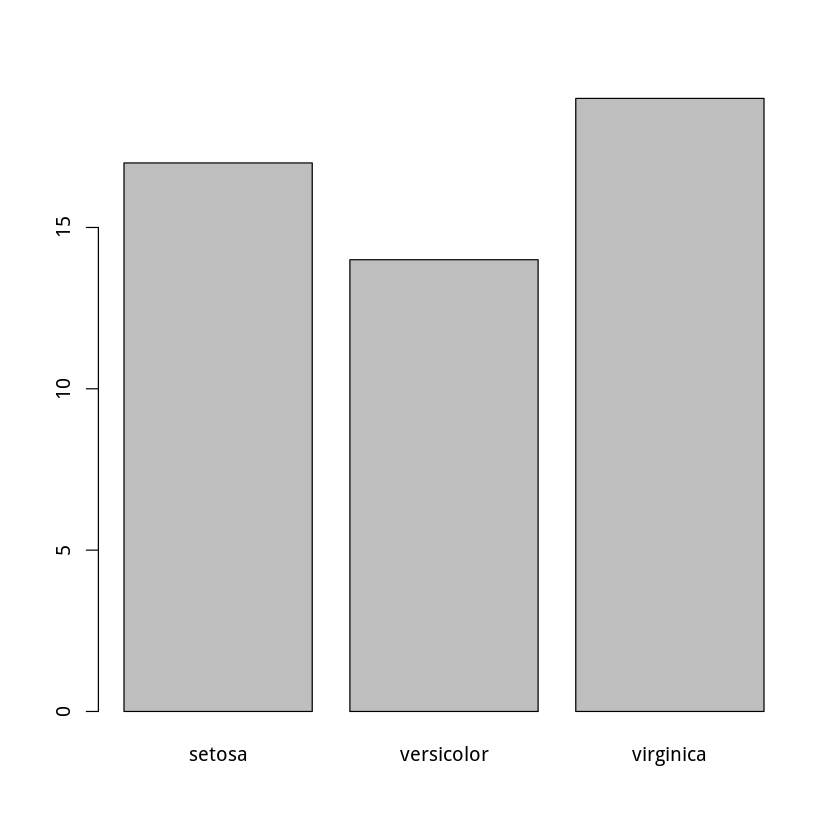

In [16]:
data(iris)
x=sample(1:150,50) #從1~150中隨機挑選50個數字
plot(iris[x,5])

### 3-2. Simple Plots-Scatter Plot

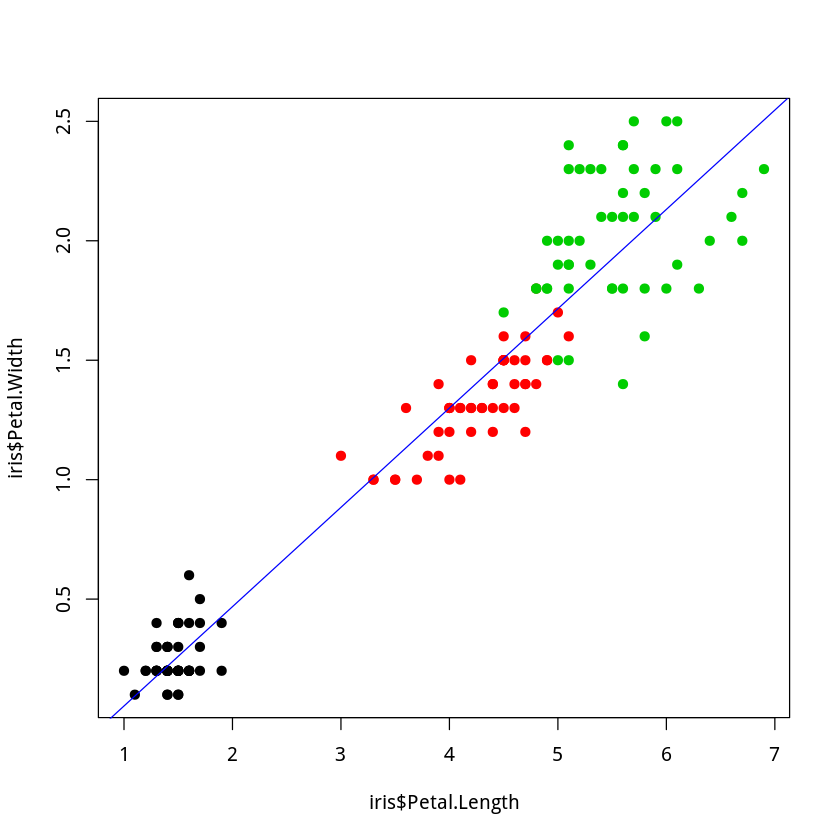

In [17]:
plot(iris$Petal.Length, iris$Petal.Width, pch=19, col=iris$Species)
abline(lm(iris$Petal.Width~iris$Petal.Length), col="blue") #abline是畫一條線（本例而言是畫迴歸線 lm)

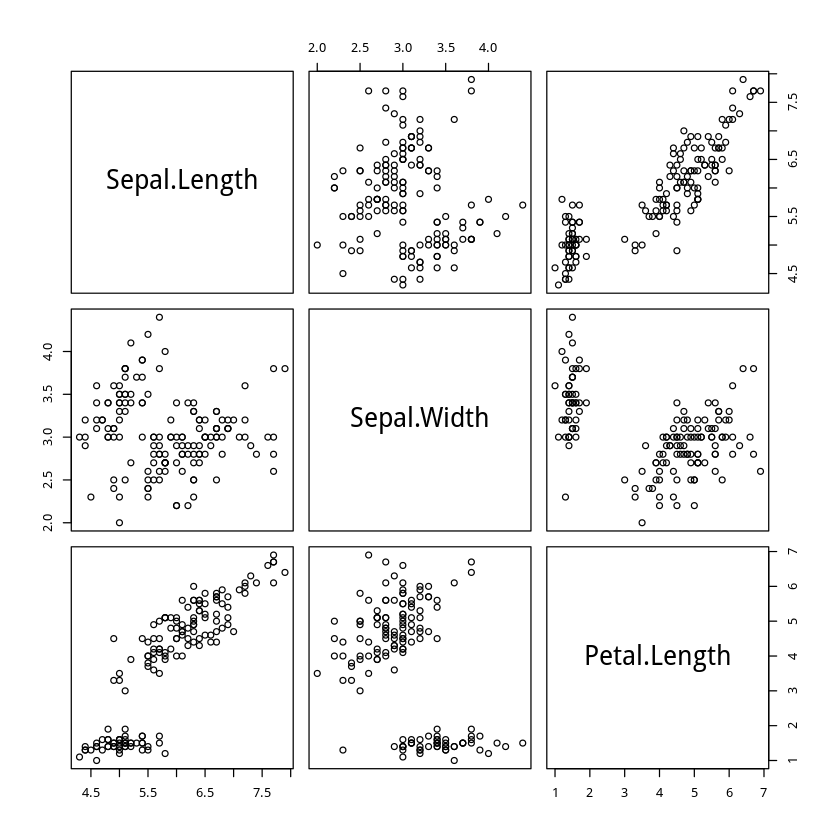

In [18]:
plot(iris[,1:3])
plot(~Sepal.Length+Sepal.Width+Petal.Length,data=iris)

### 3-3. Simple Plots-Box plot

順便教一下怎樣在同一張圖上畫很多圖

null device 
          1

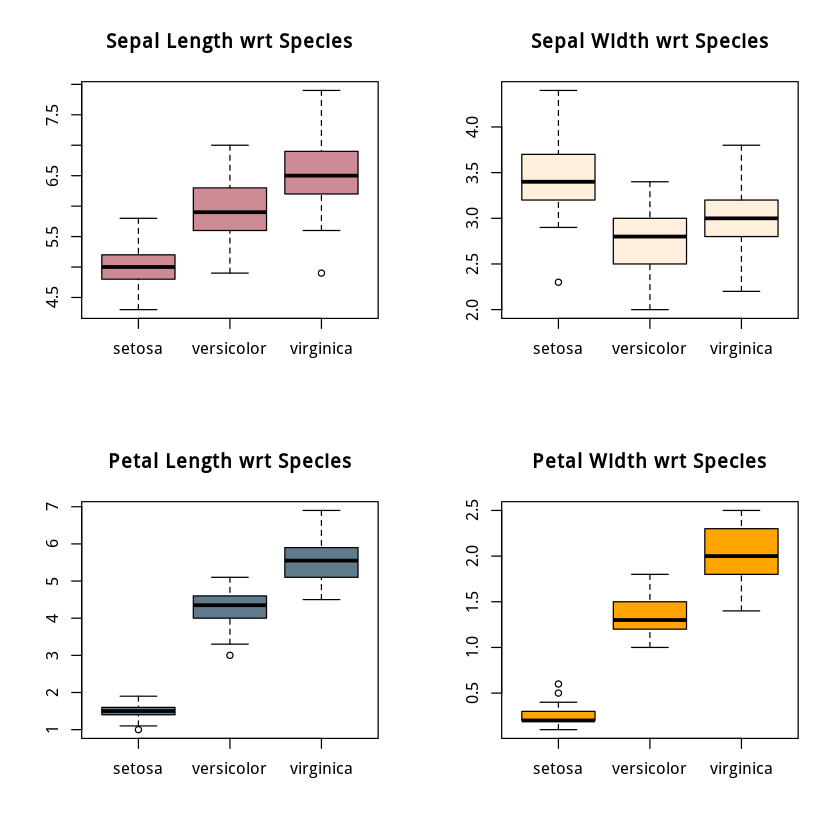

In [19]:
par(mfrow=c(2,2))
boxplot(Sepal.Length  ~ Species, iris, main = "Sepal Length wrt Species", col = "lightpink3")
boxplot(Sepal.Width   ~ Species, iris, main = "Sepal Width wrt Species", col = "antiquewhite1")
boxplot(Petal.Length  ~ Species, iris, main = "Petal Length wrt Species", col = "lightskyblue4")
boxplot(Petal.Width  ~ Species, iris, main = "Petal Width wrt Species", col = "orange1")

dev.off()

### 3-4.Simple Plots-Histgram

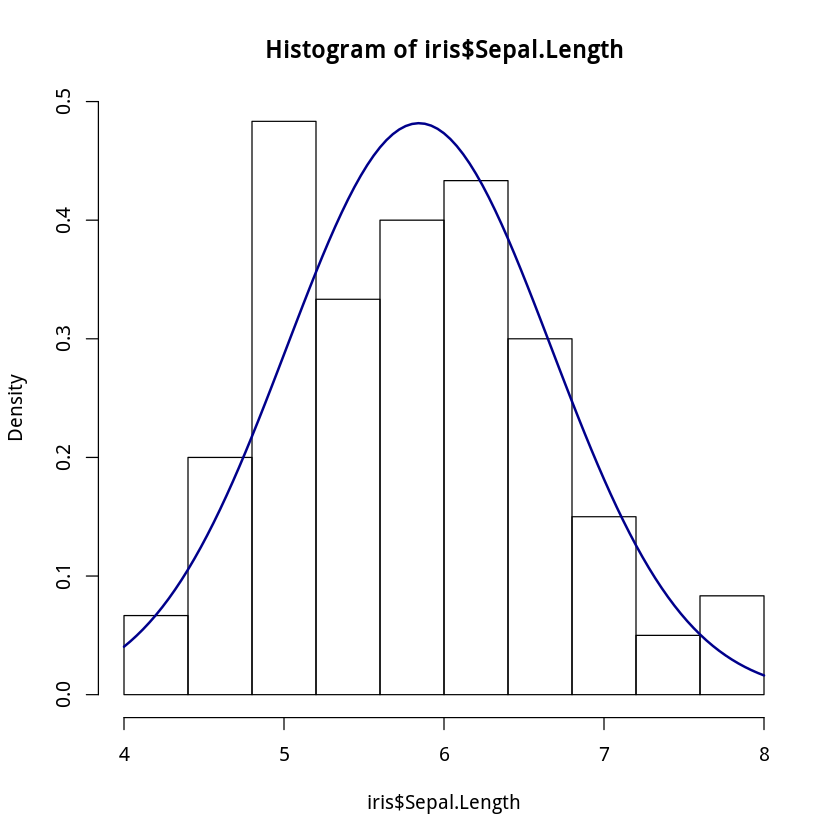

In [20]:
h3<-hist(iris$Sepal.Length, breaks=seq(4,8,by=0.4), prob=TRUE) 
m = mean(iris$Sepal.Length)
std = sqrt(var(iris$Sepal.Length))

curve(dnorm(x, mean=m, sd=std), col="darkblue", lwd=2, add=TRUE) #add=TRUE 是將曲線疊加上去

### 如果我想要畫很多張圖在一個頁面上

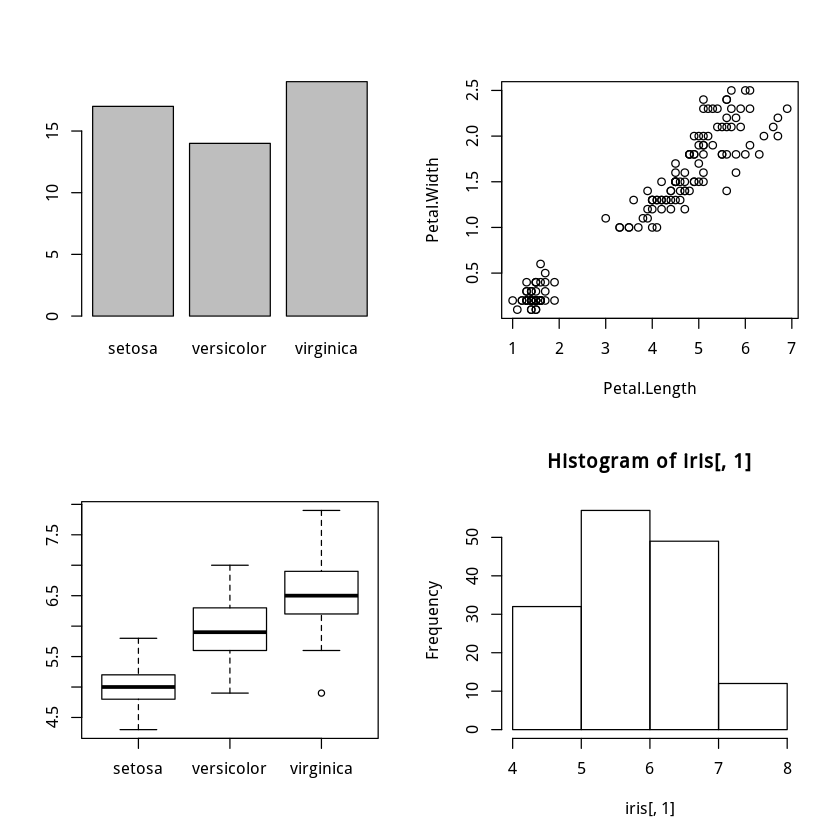

In [21]:
par(mfrow=c(2,2))
plot(iris[x,5])
plot(Petal.Width~Petal.Length,data=iris)
boxplot(Sepal.Length~Species,data=iris)
hist(iris[, 1], breaks = 4)

In [22]:
dev.off()#把圖型清除

null device 
          1

## [PART 4]. Data ETL

本小節主要在教以下三個方法

- 重新編碼
- 資料變形
- 資料合併與分割

### 4-1.重新編碼
分析資料前常常需要再次整理資料，方便日後做分析，整理資料第一步往往是將資料的調整值經過一些調整

In [23]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [24]:
data$Sepal.Length <- ifelse(data$Sepal.Length > 5, 1,2) # Sepal.Length 如果大於 5 會變成 1，不會就會變成 2
data$Species <- ifelse(data$Species %in% "setosa", "IsSetosa","Notsetosa") # %in% 代表有包含到的概念

head(data)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,3.5,1.4,0.2,IsSetosa
2,3.0,1.4,0.2,IsSetosa
2,3.2,1.3,0.2,IsSetosa
2,3.1,1.5,0.2,IsSetosa
2,3.6,1.4,0.2,IsSetosa
1,3.9,1.7,0.4,IsSetosa


### 4-2. 資料篩選 分割

In [25]:
data(iris)
iris[1:3,] ##第1~3列Row，所有的行Column
iris[,"Species"] ##所有的列Row，名稱為Species的行Column

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa


[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] setosa     setosa     setosa     setosa     setosa     setosa    
 [49] setosa     setosa     versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor versicolor versicolor versicolor versicolor
 [79] versicolor versicolor versicolor versicolor versicolor versicolor
 [85] versicolor versicolor versicolor versicolor versicolor versicolor
 [91] versicolor versicolor versicolor versicolor versicolor versicolor
 [97] versicolor versicolor versicolor versicolor virginica  virginica 
[103] virginica  virginica  virginica  virginica  virginica  virginica 
[109] virginica  virginica  virginica  virginica  virginica  virginica 
[115] virginica  virginica  virginica  virginica  virginica  virginica 
[121] virginica  virginica  virginica  virginica  virginica  virginica 
[127] virginica  virginica  virginica  virginica  virginica  virginica 
[133] virginica  virginica  virginica  virginica  virginica  virginica 
[139] virginica  virginica  virginica  virginica  virginica  virginica 
[145] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [41]:
# Row的篩選可使用subset()函數
subset(iris,Species=="virginica") ##Species等於"virginica"的列Row，所有的行Column

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
101,6.3,3.3,6.0,2.5,virginica
102,5.8,2.7,5.1,1.9,virginica
103,7.1,3.0,5.9,2.1,virginica
104,6.3,2.9,5.6,1.8,virginica
105,6.5,3.0,5.8,2.2,virginica
106,7.6,3.0,6.6,2.1,virginica
107,4.9,2.5,4.5,1.7,virginica
108,7.3,2.9,6.3,1.8,virginica
109,6.7,2.5,5.8,1.8,virginica
110,7.2,3.6,6.1,2.5,virginica


In [26]:
#Row的篩選也可搭配字串搜尋函數grepl()

knitr::kable(iris[grepl("color",iris$Species),]) ##Species包含"color"的列，所有的行



|    | Sepal.Length| Sepal.Width| Petal.Length| Petal.Width|Species    |
|:---|------------:|-----------:|------------:|-----------:|:----------|
|51  |          7.0|         3.2|          4.7|         1.4|versicolor |
|52  |          6.4|         3.2|          4.5|         1.5|versicolor |
|53  |          6.9|         3.1|          4.9|         1.5|versicolor |
|54  |          5.5|         2.3|          4.0|         1.3|versicolor |
|55  |          6.5|         2.8|          4.6|         1.5|versicolor |
|56  |          5.7|         2.8|          4.5|         1.3|versicolor |
|57  |          6.3|         3.3|          4.7|         1.6|versicolor |
|58  |          4.9|         2.4|          3.3|         1.0|versicolor |
|59  |          6.6|         2.9|          4.6|         1.3|versicolor |
|60  |          5.2|         2.7|          3.9|         1.4|versicolor |
|61  |          5.0|         2.0|          3.5|         1.0|versicolor |
|62  |          5.9|         3.0|          4.2|  

### 4-3.資料分割

In [27]:
subset(iris, Sepal.Length == 5,select = c("Sepal.Length","Species")) # 只會出現 Sepal.Length 等於 5 的資料，且欄位只會出現 Sepal.Length 和 Species

,Sepal.Length,Species
5,5,setosa
8,5,setosa
26,5,setosa
27,5,setosa
36,5,setosa
41,5,setosa
44,5,setosa
50,5,setosa
61,5,versicolor
94,5,versicolor


### 4-4.排序: 使用order()函數

### [由小排到大]

In [28]:
order(iris$Sepal.Length)
#回傳的第一個位置為14，表示iris$Sepal.Length中，數值最小的元素為第14個元素。

[1]  14   9  39  43  42   4   7  23  48   3  30  12  13  25  31  46   2  10
 [19]  35  38  58 107   5   8  26  27  36  41  44  50  61  94   1  18  20  22
 [37]  24  40  45  47  99  28  29  33  60  49   6  11  17  21  32  85  34  37
 [55]  54  81  82  90  91  65  67  70  89  95 122  16  19  56  80  96  97 100
 [73] 114  15  68  83  93 102 115 143  62  71 150  63  79  84  86 120 139  64
 [91]  72  74  92 128 135  69  98 127 149  57  73  88 101 104 124 134 137 147
[109]  52  75 112 116 129 133 138  55 105 111 117 148  59  76  66  78  87 109
[127] 125 141 145 146  77 113 144  53 121 140 142  51 103 110 126 130 108 131
[145] 106 118 119 123 136 132

In [29]:
iris$Sepal.Length[14] #第14筆的數值是多少

[1] 4.3

In [30]:
head(iris[order(iris$Sepal.Length),]) ##依照Sepal.Length欄位數值大小排序後的前六筆資料

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
14,4.3,3.0,1.1,0.1,setosa
9,4.4,2.9,1.4,0.2,setosa
39,4.4,3.0,1.3,0.2,setosa
43,4.4,3.2,1.3,0.2,setosa
42,4.5,2.3,1.3,0.3,setosa
4,4.6,3.1,1.5,0.2,setosa


### [由大排到小]

- 若將decreasing參數設定為TRUE，則會回傳由大到小的元素位置，
- 以iris$Sepal.Length為例，回傳的第一個位置為132

In [31]:
order(iris$Sepal.Length,decreasing = T)

#表示iris$Sepal.Length中，數值最大的元素為第132個元素。

[1] 132 118 119 123 136 106 131 108 110 126 130 103  51  53 121 140 142  77
 [19] 113 144  66  78  87 109 125 141 145 146  59  76  55 105 111 117 148  52
 [37]  75 112 116 129 133 138  57  73  88 101 104 124 134 137 147  69  98 127
 [55] 149  64  72  74  92 128 135  63  79  84  86 120 139  62  71 150  15  68
 [73]  83  93 102 115 143  16  19  56  80  96  97 100 114  65  67  70  89  95
 [91] 122  34  37  54  81  82  90  91   6  11  17  21  32  85  49  28  29  33
[109]  60   1  18  20  22  24  40  45  47  99   5   8  26  27  36  41  44  50
[127]  61  94   2  10  35  38  58 107  12  13  25  31  46   3  30   4   7  23
[145]  48  42   9  39  43  14

In [32]:
iris$Sepal.Length[132]

[1] 7.9

In [33]:
head(iris[order(iris$Sepal.Length,decreasing = T),]) ##改為由大到小排序的前六筆資料

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
132,7.9,3.8,6.4,2.0,virginica
118,7.7,3.8,6.7,2.2,virginica
119,7.7,2.6,6.9,2.3,virginica
123,7.7,2.8,6.7,2.0,virginica
136,7.7,3.0,6.1,2.3,virginica
106,7.6,3.0,6.6,2.1,virginica


### [Part 5]. Social Network with R

 (Another Chapter)